In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Runge-Kutta 4

Código para função `rk4(f, y0, tf, tau)` retirado de [fabiommendes/numericos-pub](github.com/fabiommendes/numericos-pub) com autoria de [@fabiommendes](github.com/fabiommendes) para a disciplina de Métodos Numéricos ministrada na Universidade de Brasília (UnB).

In [1]:
def rk4(f, y0, tf, tau=0.1):
    """
    Resolve uma equação diferencial do tipo y'(t) = f(y, t) utilizando o método de Runge-Kutta RK4.
    
    Args:
        f: função do tipo f(y, t)
        y0: valor inicial de y em t=0
        tf: tempo final
        tau: passo temporal entre cada iteração.
    
    Results:
        Retorna dois vetores T, Y com os valores de t e y em cada passo.
    """
    
    y = y0
    t = 0
    T, Y = [t], [y]
    while t < tf:
        # Seguimos o tableau
        k1 = f(y,                                            t +   0 * tau)
        k2 = f(y + (1/2 * k1) * tau,                         t + 1/2 * tau)
        k3 = f(y + (  0 * k1 + 1/2 * k2) * tau,              t + 1/2 * tau)
        k4 = f(y + (  0 * k1 +   0 * k2 + 1 * k3) * tau,     t +   1 * tau)
        
        # Somamos os pesos
        y = y + (1/6 * k1 + 1/3*k2 + 1/3*k3 + 1/6*k4) * tau
        t += tau
        
        # Adiciona nas listas
        T.append(t)
        Y.append(y)
        
    return np.array(T), np.array(Y)

## Lotka-Volterra

As equações de Lotka-Volterra são um par de equações diferenciais de primeira ordem não-lineares e também são conhecidas como equações presa-predador. Este par de equações também é usado para modelagem de sistemas biológicos no qual duas espécies interagem, uma como presa e a outra como predador. As populações alteram-se ao longo do tempo de acordo com:

$$\begin{align}
  \frac{dp(t)}{dt} &= - c \cdot p(t) - f \cdot s \cdot p(t) \cdot v(t)\\
  \frac{dv(t)}{dt} &= r \cdot v(t) -s \cdot v(t) \cdot p(t) \\
\end{align}$$

In [3]:
#Constantes
p0 = 10;
v0 = 1;
tf = 5;
delta_t = 1e-6;
c = 1;
f = 0.4;
s = 0.4;
r = 3;

# Dinâmica populacional
def lotkaV(y, t):
    p, v = y
    return np.array([
                    -c * p + f * s * p * v,
                    r * v -s * v * p,
                    ])

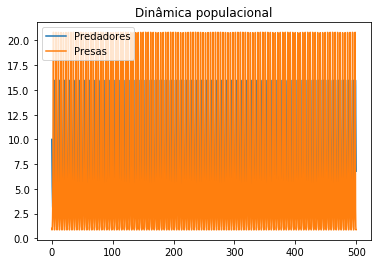

In [13]:
T, Y = rk4(lotkaV, y0=np.array([p0, v0]), tf=500, tau=0.05)
P, V = Y.T

plt.plot(T, P, label='Predadores')
plt.plot(T, V, label='Presas')
plt.title('Dinâmica populacional')
plt.legend(loc='best')
plt.show()